In [ ]:
# Thanks 2 Merve Noyan for lesson..
# Diabets Woman

In [1]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
df =pd.read_csv('./datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#feature -öznitelik lerin tablosu, her özellikten kaç satır var.
#median->%50.Value
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
df.notna().any()
df.notna().all()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

In [6]:
df["Overweight"] = [1 if x > 25 else 0 for x in df.BMI]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
plt.rcParams.update({'font.size': 25})



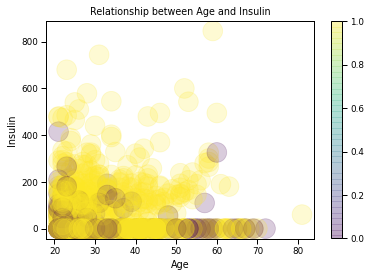

In [8]:
sns.set_context("paper")
plt.scatter(df.Age, df.Insulin, c=df.Overweight, s=389,
            alpha=0.2, cmap="viridis") #cmap renk paleti
plt.colorbar(); #hangi rengin hangi değere denk geldiğini gösteren yandaki ölçek
plt.xlabel("Age") #eksen ismi
plt.ylabel("Insulin") 
plt.title("Relationship between Age and Insulin") #plot ismi
plt.show()

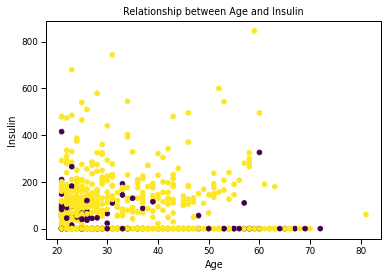

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.Age, df.Insulin, c=df.Overweight, cmap="viridis")
ax.set_xlabel("Age")
ax.set_ylabel("Insulin")
ax.set_title("Relationship between Age and Insulin")
plt.show()

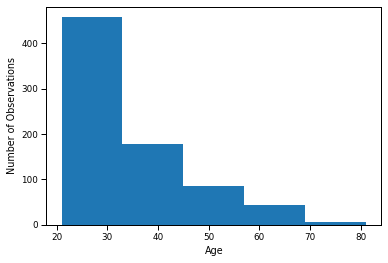

In [10]:
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age", bins=5)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()


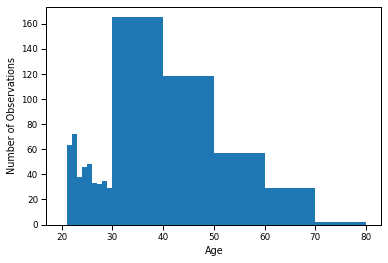

In [11]:
#kendi bins oluşturulabilir
bins=[20,21,22,23,24,25,26,27,28,29, 30, 40, 50, 60, 70, 80]
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age Bins", bins=bins)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()

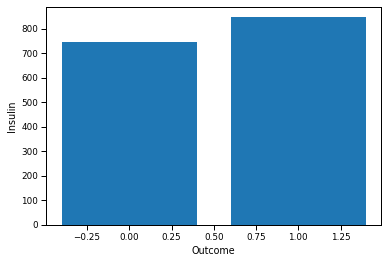

In [13]:
fig, ax = plt.subplots()
ax.bar(df.Outcome, df.Insulin)
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin")
plt.show()

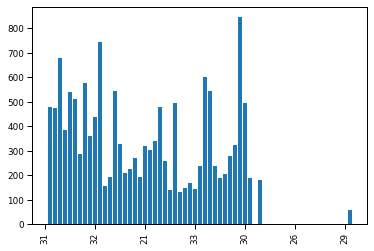

In [14]:
fig, ax = plt.subplots()
ax.bar(df.Age, df.Insulin)
ax.set_xticklabels(df.Age, rotation=90)
fig.savefig("Age.png")

In [15]:
#fig.savefig(“Age.png”): kayıp olmadan kaydeder, yüksek kalitelidir ama çok hafıza tutar
#fig.savefig(“Age.jpg”, quality=50): websitesine konulabilir
#fig.savefig(“Age.png”, dpi=200): dots per inch, dense rendering
#fig.set_size_inches([5,3]): aspect ratio

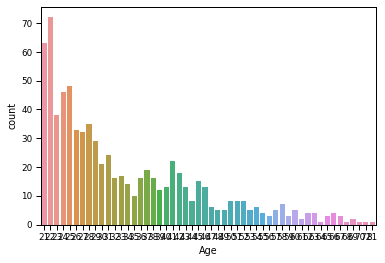

In [16]:
sns.set_palette("RdBu") # renk paleti
sns.countplot(x="Age", data=df) #yaşlar bins olmuş dinamik olarak x
plt.show()

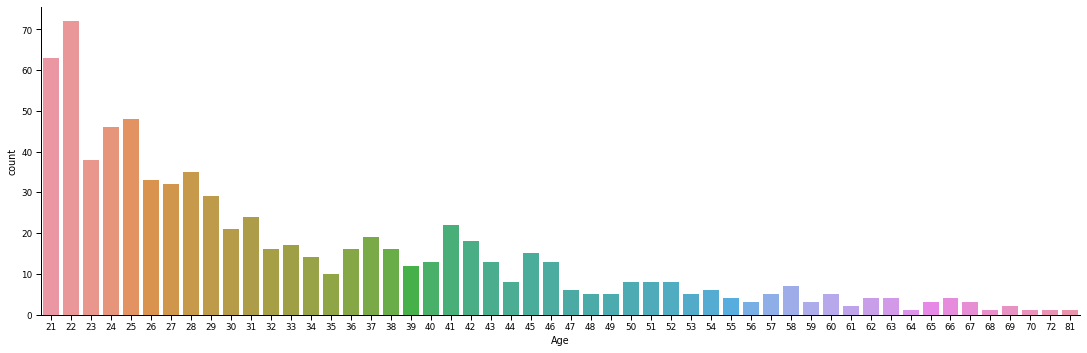

In [17]:
sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.show()

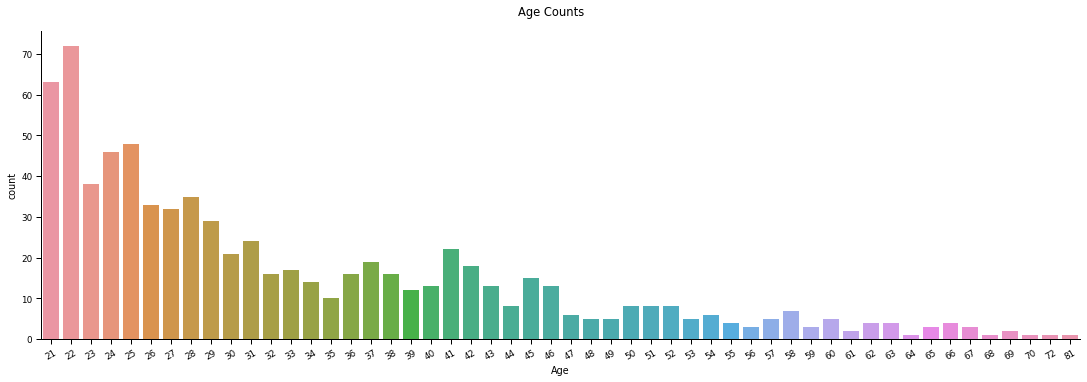

In [18]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
g.fig.suptitle("Age Counts", y=1.04) #ismi yukarı çıkarıyor
plt.xticks(rotation=30)
plt.show()

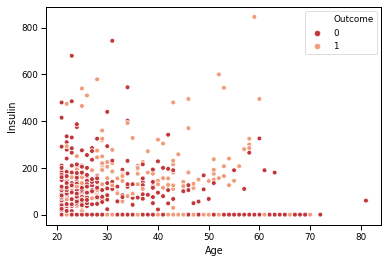

In [19]:
sns.scatterplot(x="Age", y="Insulin",data=df, hue="Outcome")
plt.show()

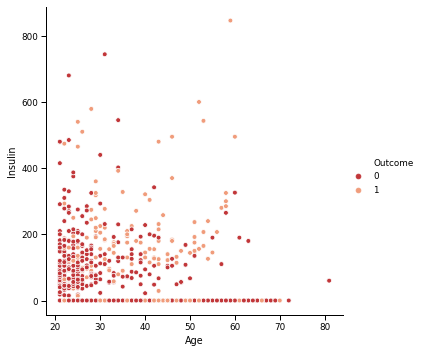

In [31]:
sns.relplot(x="Age", y="Insulin",data=df, hue="Outcome", kind="scatter")
plt.show()

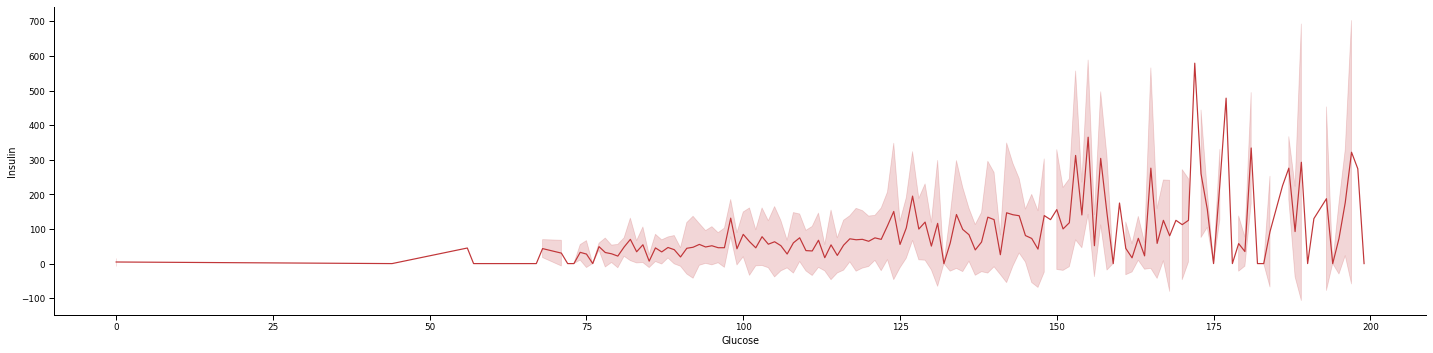

In [32]:
sns.relplot(x="Glucose", y="Insulin", data=df, aspect=4,kind="line", ci="sd", markers=True, dashes=False)
plt.show()

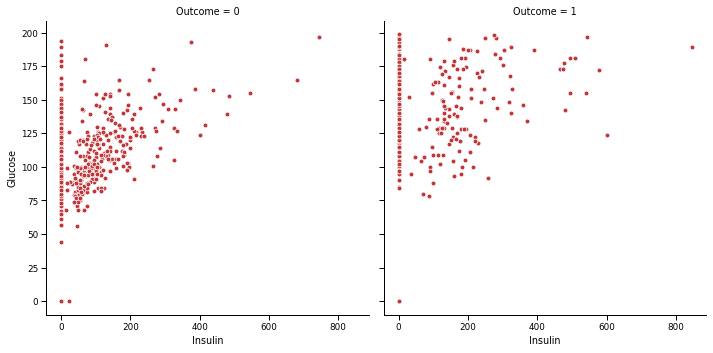

In [33]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome")
plt.show()

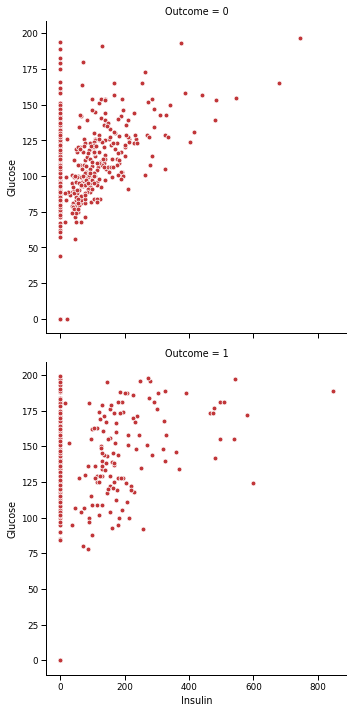

In [34]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", row="Outcome")
plt.show()

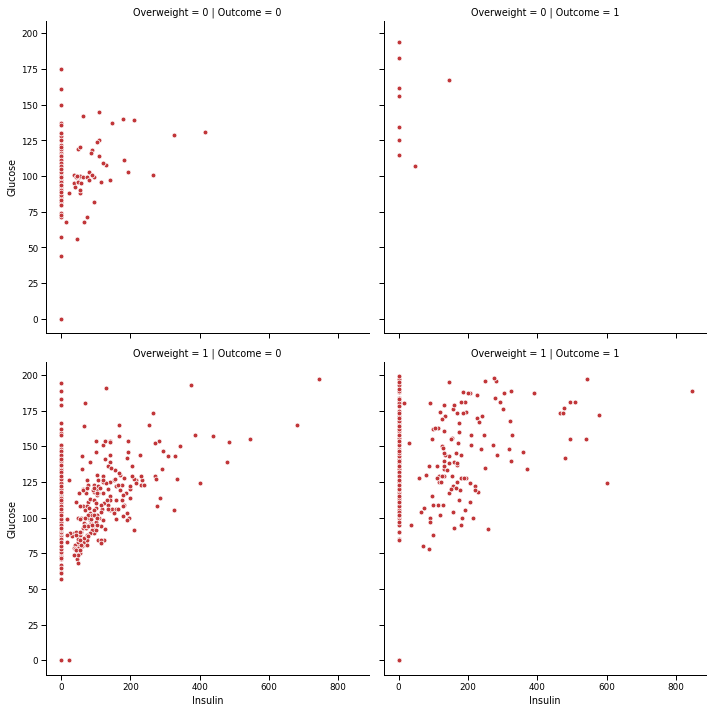

In [43]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome", row="Overweight")
plt.show()

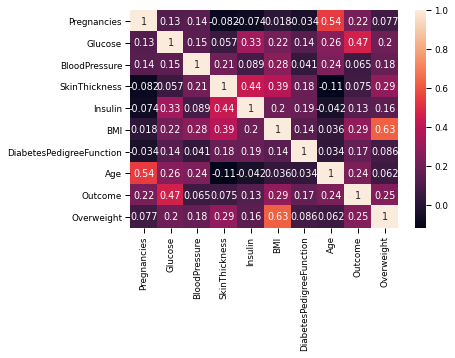

In [44]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

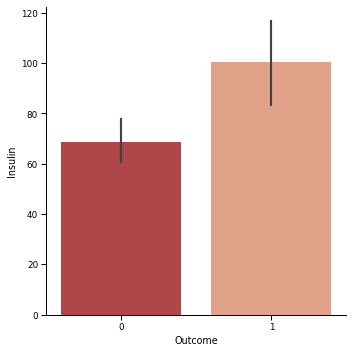

In [47]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="bar")
plt.show()

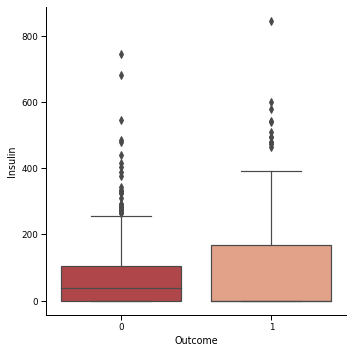

In [48]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="box")
plt.show()

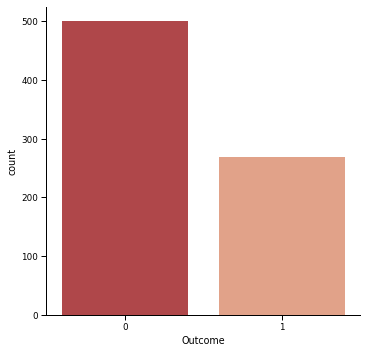

In [49]:
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()

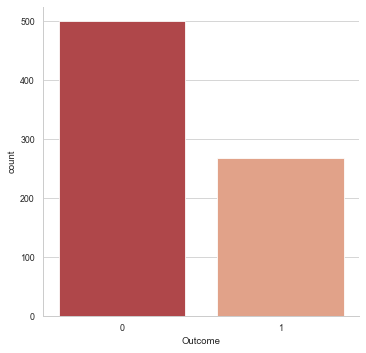

In [50]:
sns.set_style("whitegrid")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

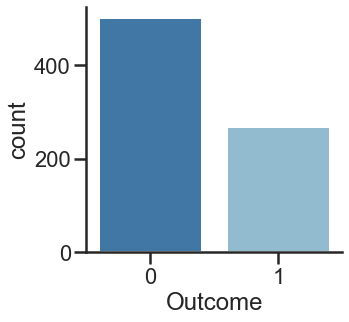

In [55]:
sns.set_palette("RdBu_r")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

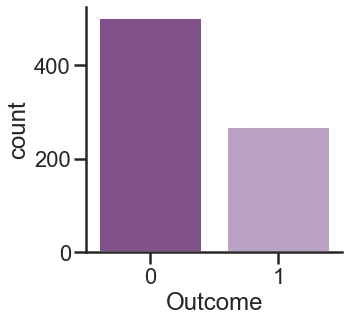

In [56]:
sns.set_palette("PRGn")
# categorical plotlarda “RdBu”, “PRGn”,”RdBu_r”,”PRGn_r”
# continuous plotlarda Greys, Blues, PuRd, GnBu
sns.set_context("poster") # paper,poster, talk
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()

In [57]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset(df)
g = sns.pairplot(iris)
plt.show()


InvalidURL: URL can't contain control characters. '/mwaskom/seaborn-data/master/     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \\\n0              6      148             72             35        0  33.6   \n1              1       85             66             29        0  26.6   \n2              8      183             64              0        0  23.3   \n3              1       89             66             23       94  28.1   \n4              0      137             40             35      168  43.1   \n..           ...      ...            ...            ...      ...   ...   \n763           10      101             76             48      180  32.9   \n764            2      122             70             27        0  36.8   \n765            5      121             72             23      112  26.2   \n766            1      126             60              0        0  30.1   \n767            1       93             70             31        0  30.4   \n\n     DiabetesPedigreeFunction  Age  Outcome  Overweight  \n0                       0.627   50        1           1  \n1                       0.351   31        0           1  \n2                       0.672   32        1           0  \n3                       0.167   21        0           1  \n4                       2.288   33        1           1  \n..                        ...  ...      ...         ...  \n763                     0.171   63        0           1  \n764                     0.340   27        0           1  \n765                     0.245   30        0           1  \n766                     0.349   47        1           1  \n767                     0.315   23        0           1  \n\n[768 rows x 10 columns].csv' (found at least ' ')